Day 6 original

/home/ironreaper/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


 Zeros are at []
 Poles are at [0.3+0.84261498j 0.3-0.84261498j]
 Gain is : 1.0


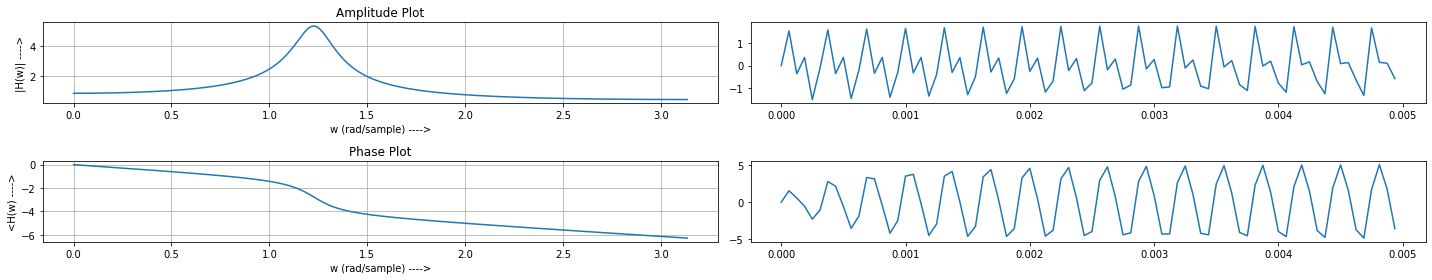

In [1]:
# Day6
# Z - Transform and DFT

# Import necessary modules
import dspmodule as dsp
import numpy as np
import matplotlib.pyplot as plt

# Define the numerator and denominator coefficients for the transfer function
b = np.array([1])  # Numerator coefficients
a = np.array([1, -0.6, 0.8])  # Denominator coefficients

# Calculate poles, zeros, and gain of the transfer function
z, p, k = dsp.tf2polezero(b, a)

print(" Zeros are at {}".format(z))
print(" Poles are at {}".format(p))
print(" Gain is : {}".format(k))

# Calculate frequency response
w, H = dsp.polezero2freq_response(z, p, k)

# Define signal parameters
Fs = 16000
w1 = 1.25
w2 = 2.5
F1 = Fs * (w1 / (2 * np.pi))
F2 = Fs * (w2 / (2 * np.pi))

# Define time parameters for the signal
Td = 5e-3
t = np.arange(0, Td, 1 / Fs)

# Generate the signal with two sinusoids
x = 1 * np.sin(2 * np.pi * F1 * t) + 1 * np.sin(2 * np.pi * F2 * t)  # Creating the signal
# We are removing parts of signal with low gain; in this case, it is w2 where gain is low or attenuation

# Apply the filter to the signal
y = dsp.linearfilter(b, a, x)

# Plotting the frequency response, original signal, and filtered signal
plt.figure(figsize=(20, 4))
plt.subplot(2, 2, 1)
plt.plot(w, np.abs(H))  # Taking absolute value since complex values for frequency response
plt.xlabel("w (rad/sample) ---->")
plt.ylabel("|H(w)| ---->")
plt.title("Amplitude Plot")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(w, np.unwrap(np.angle(H)))  # Fixing sudden phase changes like 360 + 15, similar to 360
plt.xlabel("w (rad/sample) ---->")
plt.ylabel("<H(w) ---->")
plt.title("Phase Plot")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, x)  # Plotting the original signal

plt.subplot(2, 2, 4)
plt.plot(t, y)  # Plotting the filtered signal

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()


module code

In [ ]:
# dspmodule.py

import numpy as np
from scipy.signal import freqz
from scipy.signal import lfilter


def tf2polezero(numerator_coeffs, denominator_coeffs):
    """
    Calculate zeros, poles, and gain from numerator and denominator coefficients.

    Parameters:
    numerator_coeffs (array-like): Numerator coefficients of the transfer function.
    denominator_coeffs (array-like): Denominator coefficients of the transfer function.

    Returns:
    zeros (array): Zeros of the transfer function.
    poles (array): Poles of the transfer function.
    gain (float): Gain of the transfer function.
    """
    num = numerator_coeffs
    den = denominator_coeffs
    zeros, poles = np.roots(num), np.roots(den)
    gain = num[0] / den[0]
    return zeros, poles, gain

def polezero2freq_response(zeros, poles, gain, num_points=512):
    """
    Calculate the frequency response (H) from zeros, poles, and gain.

    Parameters:
    zeros (array-like): Zeros of the transfer function.
    poles (array-like): Poles of the transfer function.
    gain (float): Gain of the transfer function.
    num_points (int, optional): Number of points for frequency response calculation.

    Returns:
    w (array): Digital frequencies (omega).
    H (array): Frequency response.
    """
    w, h = freqz(b=np.poly(zeros), a=np.poly(poles), worN=num_points)
    H = gain * h
    return w, H

def linearfilter(b, a, x):
    """
    Apply a linear filter to the input signal.

    Parameters:
    b (numpy.ndarray): Numerator coefficients of the filter.
    a (numpy.ndarray): Denominator coefficients of the filter.
    x (numpy.ndarray): Input signal.

    Returns:
    numpy.ndarray: Output signal.
    """
    b = np.atleast_1d(b)
    a = np.atleast_1d(a)
    x = np.array(x).flatten()
    y = lfilter(b, a, x)
    return y